In [7]:
%load_ext autoreload
%load_ext lab_black
%autoreload 2

import admix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
import seaborn as sns
from scipy.stats import pearsonr

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [8]:
# read local ancestry
df_lanc = pd.read_csv("out/admix_lanc.tsv", sep="\t", index_col=0)
df_lanc["lanc"] = 1.0 - df_lanc["lanc"]
df_lanc["lanc_q"] = pd.qcut(df_lanc.lanc, q=5).cat.codes + 1

In [9]:
prefix = "hsq-0.25-pcausal-0.01"
df_sum = pd.read_csv(f"out/summary/{prefix}.tsv.gz", sep="\t")

In [14]:
df_plot = {
    "group": [],
    "sim_i": [],
    "coverage": [],
    "method": [],
    "R2": [],
    "avg_len": [],
}
for group, df_group in df_sum.groupby(["GROUP", "SIM_I"]):
    df_group = df_group[df_group.IN_CAL == False]
    for method in ["CENTER", "SHIFT", "SCALE"]:
        lower = df_group[f"{method}_PRS_Q_0.1"]
        upper = df_group[f"{method}_PRS_Q_0.9"]
        center = (lower + upper) / 2
        pheno = df_group.PHENO
        coverage = np.mean((lower <= pheno) & (pheno < upper))
        df_plot["group"].append(group[0])
        df_plot["sim_i"].append(group[1])
        df_plot["coverage"].append(coverage)
        df_plot["method"].append(method)
        df_plot["R2"].append(pearsonr(center, pheno)[0] ** 2)
        df_plot["avg_len"].append(np.mean(upper - lower))

df_plot = pd.DataFrame(df_plot)

# Coverage property

Text(0, 0.5, 'Empirical coverage')

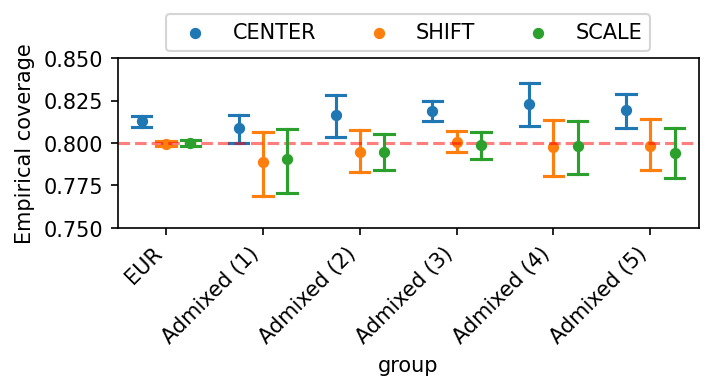

In [15]:
fig, ax = plt.subplots(figsize=(5, 1.5), dpi=150)
sns.pointplot(
    x="group",
    y="coverage",
    order=["eur_test"] + [f"admix_{i}" for i in range(1, 6)],
    hue="method",
    dodge=0.5,
    data=df_plot,
    errwidth=1.5,
    capsize=0.2,
    markers=".",
    join=False,
    ax=ax,
)
ax.axhline(y=0.8, ls="--", color="red", alpha=0.5)
ax.set_ylim(0.75, 0.85)
ax.set_xticklabels(
    ["EUR"] + [f"Admixed ({i})" for i in range(1, 6)], rotation=45, ha="right"
)
ax.legend(loc="center", bbox_to_anchor=(0.5, 1.15), ncol=3)
ax.set_ylabel("Empirical coverage")

Text(0, 0.5, '$R^2$')

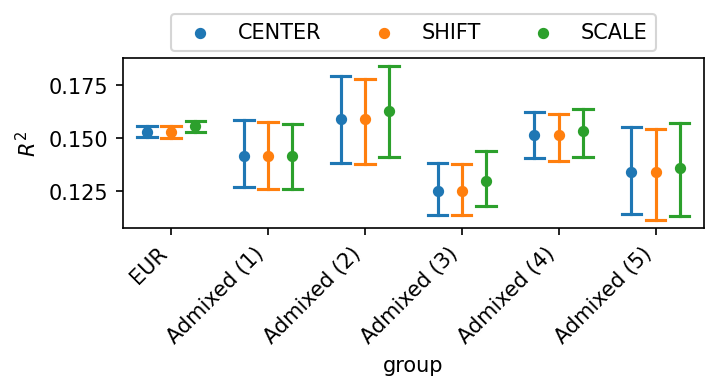

In [16]:
fig, ax = plt.subplots(figsize=(5, 1.5), dpi=150)
sns.pointplot(
    x="group",
    y="R2",
    order=["eur_test"] + [f"admix_{i}" for i in range(1, 6)],
    hue="method",
    dodge=0.5,
    data=df_plot,
    errwidth=1.5,
    capsize=0.2,
    markers=".",
    join=False,
    ax=ax,
)
ax.set_xticklabels(
    ["EUR"] + [f"Admixed ({i})" for i in range(1, 6)], rotation=45, ha="right"
)
ax.legend(loc="center", bbox_to_anchor=(0.5, 1.15), ncol=3)
ax.set_ylabel("$R^2$")

Text(0, 0.5, 'Interval length')

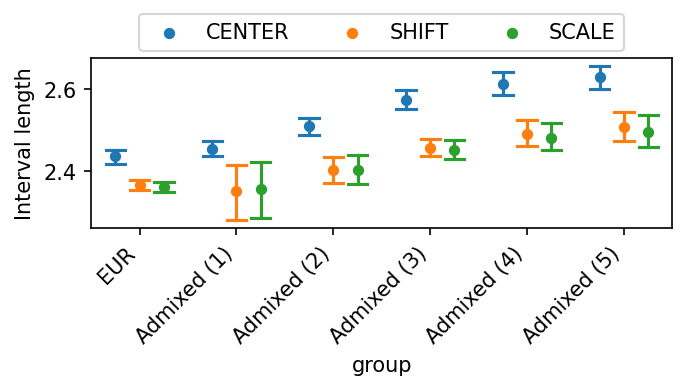

In [17]:
fig, ax = plt.subplots(figsize=(5, 1.5), dpi=150)
sns.pointplot(
    x="group",
    y="avg_len",
    order=["eur_test"] + [f"admix_{i}" for i in range(1, 6)],
    hue="method",
    dodge=0.5,
    data=df_plot,
    errwidth=1.5,
    capsize=0.2,
    markers=".",
    join=False,
    ax=ax,
)
ax.set_xticklabels(
    ["EUR"] + [f"Admixed ({i})" for i in range(1, 6)], rotation=45, ha="right"
)
ax.legend(loc="center", bbox_to_anchor=(0.5, 1.15), ncol=3)
ax.set_ylabel("Interval length")

# R2 ~ ancestry
# Predictive interval ~ ancestry

In [ ]:
df_plot = 

In [96]:
df_plot = {"group": [], "sim_i": [], "coverage": [], "method": []}
for group, df_group in df_sum.groupby(["GROUP", "SIM_I"]):
    df_group = df_group[df_group.IN_CAL == False]
    for method in ["CENTER", "SHIFT", "SCALE"]:
        coverage = np.mean(
            (df_group[f"{method}_PRS_Q_0.1"] <= df_group.PHENO)
            & (df_group.PHENO < df_group[f"{method}_PRS_Q_0.9"])
        )
        df_plot["group"].append(group[0])
        df_plot["sim_i"].append(group[1])
        df_plot["coverage"].append(coverage)
        df_plot["method"].append(method)
df_plot = pd.DataFrame(df_plot)

fig, ax = plt.subplots(figsize=(5, 1.5), dpi=150)
sns.pointplot(
    x="group",
    y="coverage",
    order=["eur_test"] + [f"admix_{i}" for i in range(1, 6)],
    hue="method",
    dodge=0.5,
    data=df_plot,
    errwidth=1.5,
    capsize=0.2,
    markers=".",
    join=False,
    ax=ax,
)
ax.axhline(y=0.8, ls="--", color="red", alpha=0.5)
ax.set_ylim(0.75, 0.85)
ax.set_xticklabels(
    ["EUR"] + [f"Admixed ({i})" for i in range(1, 6)], rotation=45, ha="right"
)
ax.legend(loc="center", bbox_to_anchor=(0.5, 1.15), ncol=3)
ax.set_ylabel("Empirical coverage")

,INDIV,GROUP,PHENO,IN_CAL,SIM_I,PRS_Q_0.1,PRS_Q_0.9,CENTER_PRS_Q_0.1,CENTER_PRS_Q_0.9,SHIFT_PRS_Q_0.1,SHIFT_PRS_Q_0.9,SCALE_PRS_Q_0.1,SCALE_PRS_Q_0.9
0,1000102_1000102,eur_test,-2.407027,False,0,-0.882906,1.511530,-0.871168,1.523267,-0.844526,1.496625,-0.860757,1.472609
1,1000774_1000774,eur_test,-0.668323,False,0,-0.969184,1.335556,-1.005203,1.299537,-0.973280,1.267614,-0.977356,1.260843
2,1000807_1000807,eur_test,-1.231381,True,0,-1.713227,0.868013,-1.731653,0.849587,-1.699821,0.817756,-1.727786,0.779498
3,1001523_1001523,eur_test,-1.668207,True,0,-1.008996,1.233444,-1.031801,1.210638,-0.998800,1.177636,-1.056508,1.119889
4,1001531_1001531,eur_test,-0.231267,False,0,-1.064808,1.315478,-1.126079,1.254208,-1.073623,1.201752,-1.125231,1.152819
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255705,6022871_6022871,admix_5,-0.057291,True,9,-1.654938,1.096615,-1.205501,1.546051,-1.122821,1.463370,-1.107046,1.505583
255706,6023479_6023479,admix_3,1.096071,False,9,-0.972379,1.578225,-0.502986,2.047618,-0.438081,1.982713,-0.389652,2.047721
255707,6024954_6024954,admix_3,1.276922,True,9,-0.958874,1.631301,-0.486540,2.103635,-0.464968,2.082063,-0.520195,2.095959
255708,6025478_6025478,admix_2,0.540803,True,9,-1.066111,1.482437,-0.539007,2.009540,-0.493168,1.963701,-0.546571,1.930361


In [64]:
df_plot = df_sum.copy()
df_plot["lanc"] = df_lanc.reindex(df_plot["INDIV"]).lanc.values
df_plot = df_plot[df_plot.SIM_I == 3]

In [65]:
import statsmodels.api as sm
from scipy.stats import pearsonr

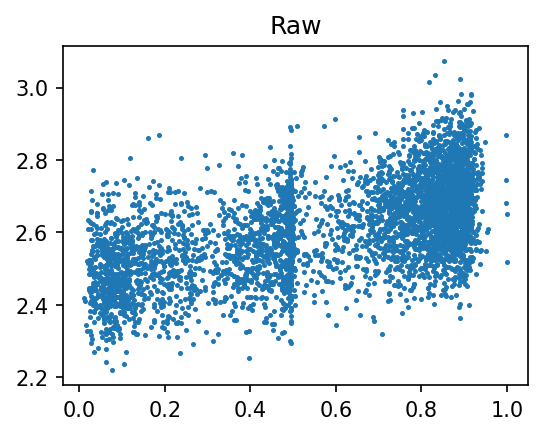

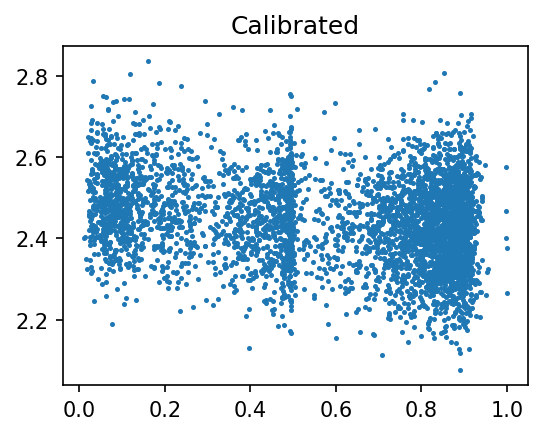

group=admix_1, coverage=0.82, raw_r2=0.1719493475599827, cal_r2=0.17462025094905081
group=admix_2, coverage=0.77, raw_r2=0.18735158906288188, cal_r2=0.18749213704580148
group=admix_3, coverage=0.79, raw_r2=0.13485333073543482, cal_r2=0.1369869618436078
group=admix_4, coverage=0.79, raw_r2=0.16338332477630507, cal_r2=0.15901078616816094
group=admix_5, coverage=0.78, raw_r2=0.14180704112615472, cal_r2=0.1413179769899614
group=eur_test, coverage=0.8, raw_r2=0.1566773063146351, cal_r2=0.1567827390521499


In [66]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=150)
ax.scatter(df_plot.lanc, df_plot["PRS_Q_0.9"] - df_plot["PRS_Q_0.1"], s=2)
ax.set_title("Raw")
plt.show()

fig, ax = plt.subplots(figsize=(4, 3), dpi=150)
ax.scatter(df_plot.lanc, df_plot["CAL_PRS_Q_0.9"] - df_plot["CAL_PRS_Q_0.1"], s=2)
ax.set_title("Calibrated")
plt.show()


for group, df_group in df_plot.groupby(["GROUP"]):
    df_group = df_group[df_group.IN_CAL == False]
    coverage = np.mean(
        (df_group["CAL_PRS_Q_0.1"] <= df_group.PHENO)
        & (df_group.PHENO < df_group["CAL_PRS_Q_0.9"])
    )
    raw_r2 = (
        pearsonr(df_group["PHENO"], df_group["PRS_Q_0.1"] + df_group["PRS_Q_0.9"])[0]
        ** 2
    )
    cal_r2 = (
        pearsonr(
            df_group["PHENO"], df_group["CAL_PRS_Q_0.1"] + df_group["CAL_PRS_Q_0.9"]
        )[0]
        ** 2
    )

    print(f"group={group}, coverage={coverage:.2g}, raw_r2={raw_r2}, cal_r2={cal_r2}")

In [ ]:
# before calibration
df_admix_plot = df_summary[df_summary.GROUP.str.startswith("admix")].copy()
df_admix_plot = df_admix_plot.sample(n=100)
df_admix_plot["lanc"] = df_lanc["lanc"].reindex(df_admix_plot.index)

fig, ax = plt.subplots(figsize=(5, 3), dpi=150)

ax.errorbar(
    x=df_admix_plot.lanc,
    y=(df_admix_plot[f"PRS_Q_0.9"] + df_admix_plot[f"PRS_Q_0.1"]) / 2,
    yerr=(df_admix_plot[f"PRS_Q_0.9"] - df_admix_plot[f"PRS_Q_0.1"]) / 2,
    ecolor="lightgray",
    fmt=".",
    markersize=0,
    elinewidth=1.0,
    capsize=2,
)

ax.scatter(
    x=df_admix_plot.lanc,
    y=df_admix_plot["PHENO"],
)

ax.set_xlabel("Prop. of African ancestries")
ax.set_ylabel("Prediction interval length")

In [ ]:
# before calibration
df_admix_plot = df_summary[df_summary.GROUP.str.startswith("admix")].copy()
df_admix_plot = df_admix_plot.sample(n=100)
df_admix_plot["lanc"] = df_lanc["lanc"].reindex(df_admix_plot.index)

fig, ax = plt.subplots(figsize=(5, 3), dpi=150)

ax.errorbar(
    x=df_admix_plot.lanc,
    y=(df_admix_plot[f"PRS_Q_0.9"] + df_admix_plot[f"PRS_Q_0.1"]) / 2,
    yerr=(df_admix_plot[f"PRS_Q_0.9"] - df_admix_plot[f"PRS_Q_0.1"]) / 2,
    ecolor="lightgray",
    fmt=".",
    markersize=0,
    elinewidth=1.0,
    capsize=2,
)

ax.scatter(
    x=df_admix_plot.lanc,
    y=df_admix_plot["PHENO"],
)

ax.set_xlabel("Prop. of African ancestries")
ax.set_ylabel("Prediction interval length")

# after calibration
df_admix_plot = df_calibrated[df_calibrated.GROUP.str.startswith("admix")].copy()
df_admix_plot = df_admix_plot.sample(n=100)
df_admix_plot["lanc"] = df_lanc["lanc"].reindex(df_admix_plot.index)

fig, ax = plt.subplots(figsize=(5, 3), dpi=150)

ax.errorbar(
    x=df_admix_plot.lanc,
    y=(df_admix_plot[f"PRS_Q_0.9"] + df_admix_plot[f"PRS_Q_0.1"]) / 2,
    yerr=(df_admix_plot[f"PRS_Q_0.9"] - df_admix_plot[f"PRS_Q_0.1"]) / 2,
    ecolor="lightgray",
    fmt=".",
    markersize=0,
    elinewidth=1.0,
    capsize=2,
)

ax.scatter(
    x=df_admix_plot.lanc,
    y=df_admix_plot["PHENO"],
)
ax.set_xlabel("Prop. of African ancestries")
ax.set_ylabel("Prediction interval length")

In [ ]:
# before calibration
df_admix_plot = df_summary[df_summary.GROUP.str.startswith("admix")].copy()
df_admix_plot["lanc"] = df_lanc["lanc"].reindex(df_admix_plot.index)

fig, ax = plt.subplots(figsize=(3, 3), dpi=150)
ax.scatter(
    df_admix_plot.lanc, df_admix_plot[f"PRS_Q_0.9"] - df_admix_plot[f"PRS_Q_0.1"], s=0.2
)
ax.set_xlabel("Prop. of African ancestries")
ax.set_ylabel("Prediction interval length")

# after calibration
df_admix_plot = df_calibrated[df_calibrated.GROUP.str.startswith("admix")].copy()
df_admix_plot["lanc"] = df_lanc["lanc"].reindex(df_admix_plot.index)

fig, ax = plt.subplots(figsize=(3, 3), dpi=150)
ax.scatter(
    df_admix_plot.lanc, df_admix_plot[f"PRS_Q_0.9"] - df_admix_plot[f"PRS_Q_0.1"], s=0.2
)
ax.set_xlabel("Prop. of African ancestries")
ax.set_ylabel("Prediction interval length")

In [63]:
data_dir = "out/ldpred2/hsq-0.05-pcausal-0.01"

In [87]:
sim_i = 2

In [88]:
df_test_prs = pd.read_csv(join(data_dir, f"sim_{sim_i}.test_prs.tsv.gz"), sep="\t")

In [89]:
df_pheno_g = pd.read_csv(
    join("out/pheno/hsq-0.05-pcausal-0.01/sim.pheno_g.tsv"), sep="\t", index_col=0
)
df_pheno_g = df_pheno_g[df_pheno_g.GROUP == "eur_test"][[f"SIM_{sim_i}"]].rename(
    columns={f"SIM_{sim_i}": "GV"}
)
assert np.all(df_test_prs.FID_IID == df_pheno_g.index)

In [90]:
pred_interval = np.quantile(
    df_test_prs[[f"SAMPLE_{i}" for i in range(1, 501)]], q=[0.3, 0.7], axis=1
)
df_plot = df_pheno_g.copy()

df_plot["PRS_LOWER"] = pred_interval[0, :]
df_plot["PRS_UPPER"] = pred_interval[1, :]
df_plot["PRS_MEAN"] = df_test_prs["MEAN"].values

In [91]:
intercept = df_plot.GV.mean() - df_plot["PRS_MEAN"].mean()
for col in ["PRS_MEAN", "PRS_LOWER", "PRS_UPPER"]:
    df_plot[col] += intercept

In [92]:
coverage = np.mean((df_plot.PRS_LOWER <= df_plot.GV) & (df_plot.GV < df_plot.PRS_UPPER))
coverage

0.810500564546481

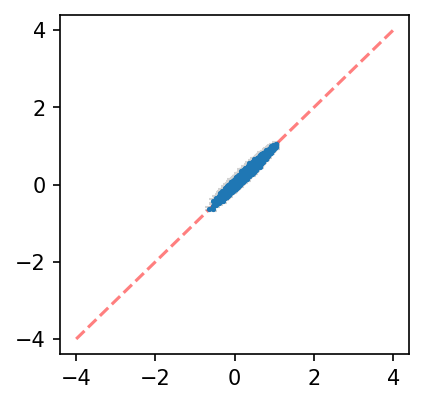

In [80]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=150)
ax.errorbar(
    x=df_plot.GV,
    y=df_plot.PRS_MEAN,
    yerr=(
        df_plot.PRS_MEAN - df_plot.PRS_LOWER,
        df_plot.PRS_UPPER - df_plot.PRS_MEAN,
    ),
    ecolor="lightgray",
    fmt=".",
    markersize=3,
    elinewidth=1.0,
    capsize=2,
)
plt.plot([-4, 4], [-4, 4], color="red", ls="--", alpha=0.5)

In [2]:
df_info = pd.read_csv(join(data_dir, "chr22_h2_0.5_cau_0.1.sim_0.csv.gz"), index_col=0)
intercept = df_info.GV.mean() - df_info["PRS_MEAN"].mean()
for col in ["PRS_MEAN", "PRS_LOWER", "PRS_UPPER"]:
    df_info[col] += intercept

NameError: name 'data_dir' is not defined

In [ ]:
for pop in ["EUR", "ADMIX"]:
    df_subset = df_info[df_info.POP == pop]
    coverage = np.mean(
        (df_subset.PRS_LOWER <= df_subset.GV) & (df_subset.GV < df_subset.PRS_UPPER)
    )
    print(pop, coverage)